**Joint Angle Comparison**

In [ ]:
#pip install pandas

In [ ]:
#pip install seaborn

In [20]:
#pip install -U scikit-learn scipy matplotlib

In [2]:
# joint_names = ["LShoulderRoll", "LShoulderPitch","RShoulderRoll","RShoulderPitch",
#                "HeadYaw","HeadPitch", "LElbowRoll", "RElbowRoll", "LHand", "RHand"]

In [19]:

#actual_data = pd.read_csv('ReferenceRobotAngles.csv')
#predicted_data = pd.read_csv('ControlRobotAngles.csv')

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def calculate_mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

def calculate_rmse(actual, predicted):
    mse = calculate_mse(actual, predicted)
    return np.sqrt(mse)

def calculate_task_errors(actual_dataset, predicted_dataset):
    task_errors = []
    for task_idx in range(len(actual_dataset)):
        actual_angles = actual_dataset[task_idx]
        predicted_angles = predicted_dataset[task_idx]
        mse = calculate_mse(actual_angles, predicted_angles)
        rmse = calculate_rmse(actual_angles, predicted_angles)
        task_errors.append((mse, rmse))
    return task_errors

# Read data from CSV files
actual_data = pd.read_csv('ReferenceRobotAngles.csv')
predicted_data = pd.read_csv('ControlRobotAngles.csv')

In [40]:
# Extract joint angle columns
joint_angle_columns = actual_data.columns[1:]  # Exclude the 'Task' column

mse_per_joint_per_task = {}
rmse_per_joint_per_task = {}

for joint in joint_angle_columns:
    mse_per_task = []
    rmse_per_task = []
    for task in range(len(actual_data)):
        actual_joint_angle = actual_data.loc[task, joint]
        predicted_joint_angle = predicted_data.loc[task, joint]
        mse = calculate_mse(actual_joint_angle, predicted_joint_angle)
        rmse = calculate_rmse(actual_joint_angle, predicted_joint_angle)
        mse_per_task.append(mse)
        rmse_per_task.append(rmse)
    mse_per_joint_per_task[joint] = mse_per_task
    rmse_per_joint_per_task[joint] = rmse_per_task

for joint in joint_angle_columns:
    print(f"Joint: {joint}")
    for task in range(len(actual_data)):
        print(f"Task {task + 1}:")
        print("Mean Square Error (MSE):", mse_per_joint_per_task[joint][task])
        print("Root Mean Square Error (RMSE):", rmse_per_joint_per_task[joint][task])
        print()

Joint: LShoulderRoll
Task 1:
Mean Square Error (MSE): 0.29757025
Root Mean Square Error (RMSE): 0.5455

Task 2:
Mean Square Error (MSE): 0.4554225224999999
Root Mean Square Error (RMSE): 0.67485

Task 3:
Mean Square Error (MSE): 0.17540181610000002
Root Mean Square Error (RMSE): 0.41881

Task 4:
Mean Square Error (MSE): 0.2424971536
Root Mean Square Error (RMSE): 0.49244

Joint: LShoulderPitch
Task 1:
Mean Square Error (MSE): 0.9467095401000001
Root Mean Square Error (RMSE): 0.97299

Task 2:
Mean Square Error (MSE): 4.350144490000001
Root Mean Square Error (RMSE): 2.0857

Task 3:
Mean Square Error (MSE): 0.26512201000000013
Root Mean Square Error (RMSE): 0.5149000000000001

Task 4:
Mean Square Error (MSE): 0.26512201000000013
Root Mean Square Error (RMSE): 0.5149000000000001

Joint: RShoulderRoll
Task 1:
Mean Square Error (MSE): 0.6739260649000001
Root Mean Square Error (RMSE): 0.82093

Task 2:
Mean Square Error (MSE): 0.2523655696
Root Mean Square Error (RMSE): 0.50236

Task 3:
Mean S

In [41]:
print(mse_per_joint_per_task)

{'LShoulderRoll': [0.29757025, 0.4554225224999999, 0.17540181610000002, 0.2424971536], 'LShoulderPitch': [0.9467095401000001, 4.350144490000001, 0.26512201000000013, 0.26512201000000013], 'RShoulderRoll': [0.6739260649000001, 0.2523655696, 0.2342076025, 0.2492605476], 'RShoulderPitch': [2.3141407129000005, 2.3841212836, 0.02385171360000004, 0.0011175649000000048], 'HeadYaw': [0.0499656609, 0.0147573904, 0.0248503696, 0.034890504100000004], 'HeadPitch': [0.0071605444, 0.0022306729000000003, 0.00549081, 0.0], 'LElbowRoll': [0.00121801, 0.00121801, 0.00121801, 0.00121801], 'RElbowRoll': [0.0012404484, 0.15314699560000003, 0.32955636489999995, 0.17292290559999998], 'Land': [0.0, 0.0, 0.0, 0.0], 'RHand': [0.0, 0.0, 0.0, 0.0]}


4.350144490000001


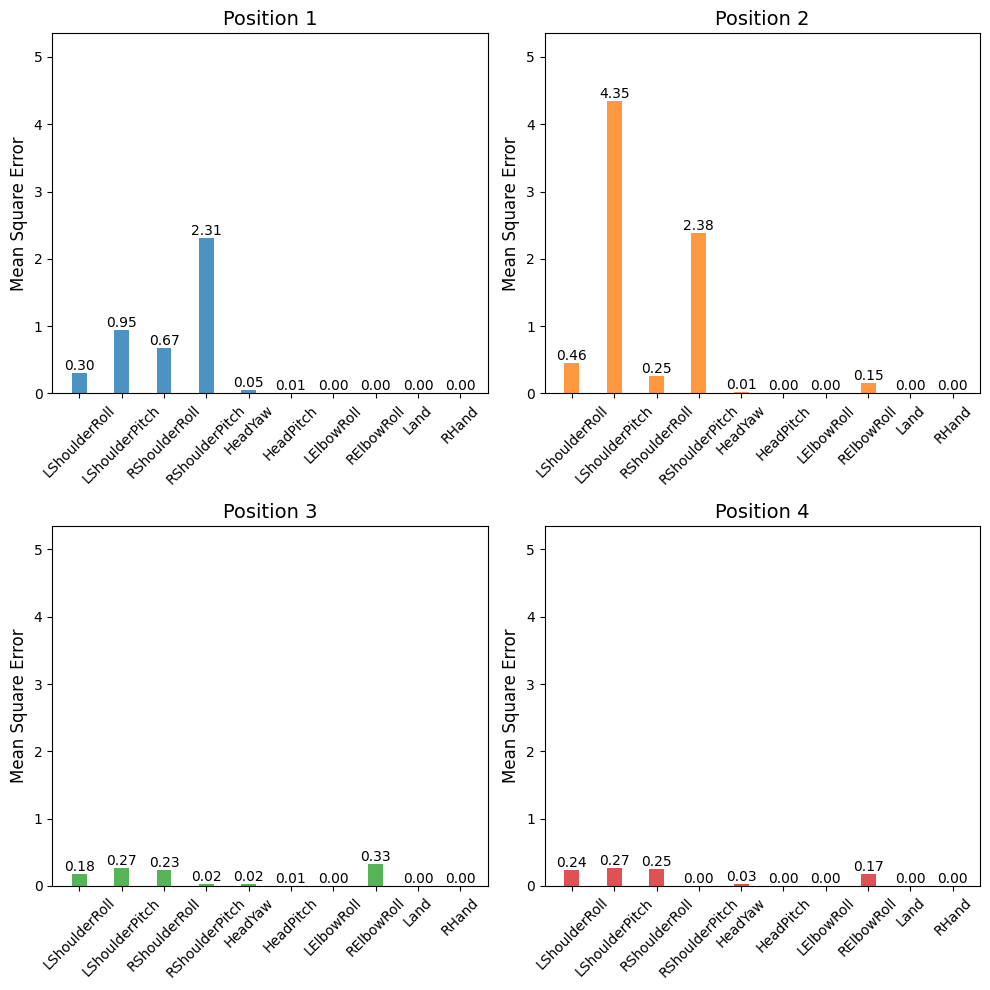

In [42]:
# Calculate maximum MSE value for y-axis range
max_mse = max([max(mse_per_joint_per_task[joint]) for joint in joint_angle_columns])
print(max_mse)

# Create bar plots for MSE per task
tasks = np.arange(1, len(actual_data) + 1)
bar_width = 0.35
opacity = 0.8
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Define the number of rows and columns for the subplot grid. 
# If you have more than 4 tasks, you may want to adjust these values.
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10)) # Adjust figure size here
axes = axes.flatten()  # flatten array for easy iteration

for i in range(len(actual_data)):
    mse_values = [mse_per_joint_per_task[joint][i] for joint in joint_angle_columns]
    ax = axes[i % len(axes)]  # Cycle through axes

    ax.bar(joint_angle_columns, mse_values, width=bar_width, alpha=opacity, color=colors[i % len(colors)])
    ax.set_ylim([0, max(mse_values) + 1])

    #ax.set_xlabel('Joint', fontsize=12)
    ax.set_ylabel('Mean Square Error', fontsize=12)
    ax.set_title(f'Position {i + 1}', fontsize=14)
    ax.set_xticks(joint_angle_columns)
    ax.set_xticklabels(joint_angle_columns, rotation=45, fontsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim([0, max_mse+1])

    # Annotate MSE values on top of bars
    for j, mse in enumerate(mse_values):
        ax.text(j, mse, f'{mse:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()





In [94]:
# Create a dictionary with joint angles as keys and MSE values as values
data_dict = {joint: mse_per_joint_per_task[joint] for joint in joint_angle_columns}

# Convert the dictionary to a dataframe
df = pd.DataFrame(data_dict)

# Set appropriate row names, if required. Here, I'm assuming your row names are "Position 1", "Position 2", etc.
df.index = [f'Position {i + 1}' for i in range(len(actual_data))]

# Display the dataframe
print(df)
df = df.transpose()

# Get five closest to 5
five_closest = df.melt()['value'].apply(lambda x: abs(x-5)).nsmallest(3).index

def highlight_closest_to_5(val):
    if val in df.melt().iloc[five_closest]['value'].values:
        return 'background-color: yellow'
    else:
        return ''
df.columns = ["Position 1<br>Arms to the side", "Position 2<br>Arms to the front", 
              "Position 3<br>Head turned left", "Position 4<br>Head turned down"]

styled_transposed_df = df.style.applymap(highlight_closest_to_5).set_table_styles([
    {"selector": "th", "props": [("font-size", "12pt"), ("color", "black"), 
                                 ("background-color", "rgba(173, 216, 230, 0.5)"), ("text-align", "center")]},
    {"selector": "td", "props": [("font-size", "12pt"), ("color", "black"), ("text-align", "center")]}
]).set_properties(**{
    'text-align': 'center',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid'
}).format("{:.3f}")

display(styled_transposed_df)


            LShoulderRoll  LShoulderPitch  RShoulderRoll  RShoulderPitch  \
Position 1       0.297570        0.946710       0.673926        2.314141   
Position 2       0.455423        4.350144       0.252366        2.384121   
Position 3       0.175402        0.265122       0.234208        0.023852   
Position 4       0.242497        0.265122       0.249261        0.001118   

             HeadYaw  HeadPitch  LElbowRoll  RElbowRoll  Land  RHand  
Position 1  0.049966   0.007161    0.001218    0.001240   0.0    0.0  
Position 2  0.014757   0.002231    0.001218    0.153147   0.0    0.0  
Position 3  0.024850   0.005491    0.001218    0.329556   0.0    0.0  
Position 4  0.034891   0.000000    0.001218    0.172923   0.0    0.0  


,Position 1Arms to the side,Position 2Arms to the front,Position 3Head turned left,Position 4Head turned down
LShoulderRoll,0.298,0.455,0.175,0.242
LShoulderPitch,0.947,4.350,0.265,0.265
RShoulderRoll,0.674,0.252,0.234,0.249
RShoulderPitch,2.314,2.384,0.024,0.001
HeadYaw,0.050,0.015,0.025,0.035
HeadPitch,0.007,0.002,0.005,0.000
LElbowRoll,0.001,0.001,0.001,0.001
RElbowRoll,0.001,0.153,0.330,0.173
Land,0.000,0.000,0.000,0.000
RHand,0.000,0.000,0.000,0.000


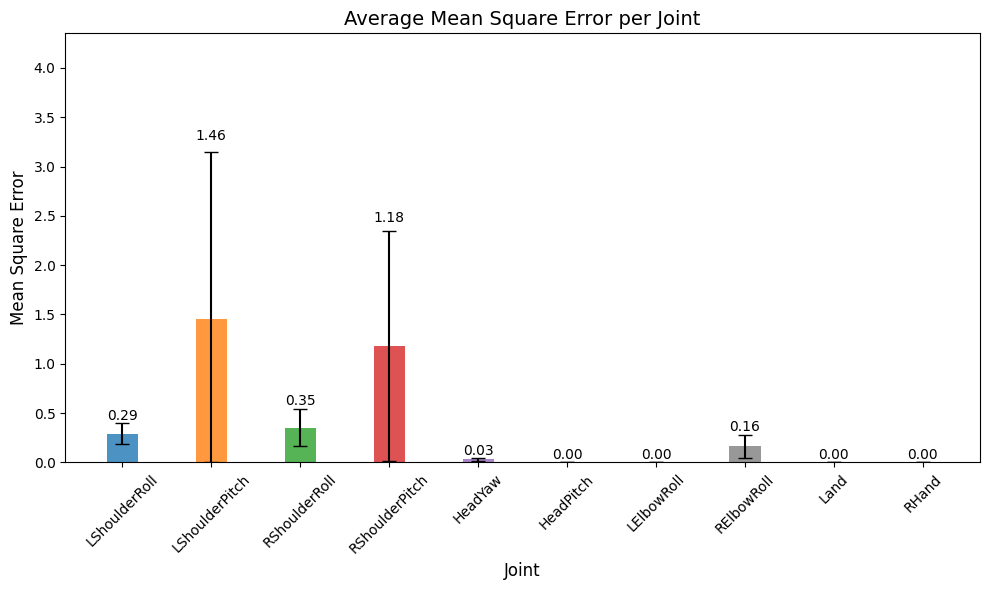

In [90]:
# Calculate average MSE values and standard deviations for each joint
average_mse_per_joint = [np.mean([mse_per_joint_per_task[joint][i] for i in range(len(actual_data))]) for joint in joint_angle_columns]
std_mse_per_joint = [np.std([mse_per_joint_per_task[joint][i] for i in range(len(actual_data))]) for joint in joint_angle_columns]

# Calculate positive error values by taking the absolute values of standard deviations
positive_error_values = np.abs(std_mse_per_joint)
# Calculate negative error values but ensure they don't cross 0
negative_error_values = [min(average_mse_per_joint[i], std_mse_per_joint[i]) for i in range(len(std_mse_per_joint))]

# Create error bars with different lower and upper limits
error = [negative_error_values, positive_error_values]

# Create bar plot with error bars for average MSE per joint
bar_width = 0.35
opacity = 0.8
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size here

mse_values = average_mse_per_joint

ax.bar(joint_angle_columns, mse_values, width=bar_width, alpha=opacity, color=colors, yerr=error, capsize=5)

ax.set_xlabel('Joint', fontsize=12)
ax.set_ylabel('Mean Square Error', fontsize=12)
ax.set_title('Average Mean Square Error per Joint', fontsize=14)
ax.set_xticks(joint_angle_columns)
ax.set_xticklabels(joint_angle_columns, rotation=45, fontsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylim([0, max_mse])

# Annotate average MSE values above the error bars
annotation_height_factor = 1.05  # Adjust this factor to move annotation up or down
for j, mse in enumerate(mse_values):
    ax.text(j, mse + std_mse_per_joint[j]*annotation_height_factor, f'{mse:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


